In [ ]:
# Ensure plots show inline
%matplotlib inline

import cv2
import os
from matplotlib import pyplot as plt

# -----------------------------
# Helper functions
# -----------------------------
def to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def denoise(img, h=15, apply_blur=True, blur_ksize=(5,5)):
    processed = img.copy()
    
    # Step 1: Optional Gaussian blur to reduce small noise spikes
    if apply_blur:
        processed = cv2.GaussianBlur(processed, blur_ksize, 0)
    
    # Step 2: Edge-preserving denoising
    denoised = cv2.fastNlMeansDenoising(processed, h=h)
    
    return denoised

def segment(img):
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    return thresh

def draw_contours(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_copy, contours, -1, (0,255,0), 2)
    return img_copy

def show_images(images, titles):
    plt.figure(figsize=(15,5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:  # grayscale
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()
display_limit = 5
display_count = 0

def detect_edges(img, low_threshold=50, high_threshold=150):
    edges = cv2.Canny(img, low_threshold, high_threshold)
    return edges



In [12]:
# Input folder (original puzzle images)
puzzle_folder = r"C:\Term 5\image_project\OneDrive_2025-11-26\Jigsaw Puzzle Dataset\Gravity Falls\puzzle_2x2"

# Output folder (processed results)
output_folder = r"C:\Term 5\image_project\OneDrive_2025-11-26\Jigsaw Puzzle Dataset\results\results_2x2"
os.makedirs(output_folder, exist_ok=True)

# List PNG files
files = [f for f in os.listdir(puzzle_folder) if f.endswith(".jpg") or f.endswith(".png")]
print(f"Found {len(files)} images in {puzzle_folder}")


Found 110 images in C:\Term 5\image_project\OneDrive_2025-11-26\Jigsaw Puzzle Dataset\Gravity Falls\puzzle_2x2


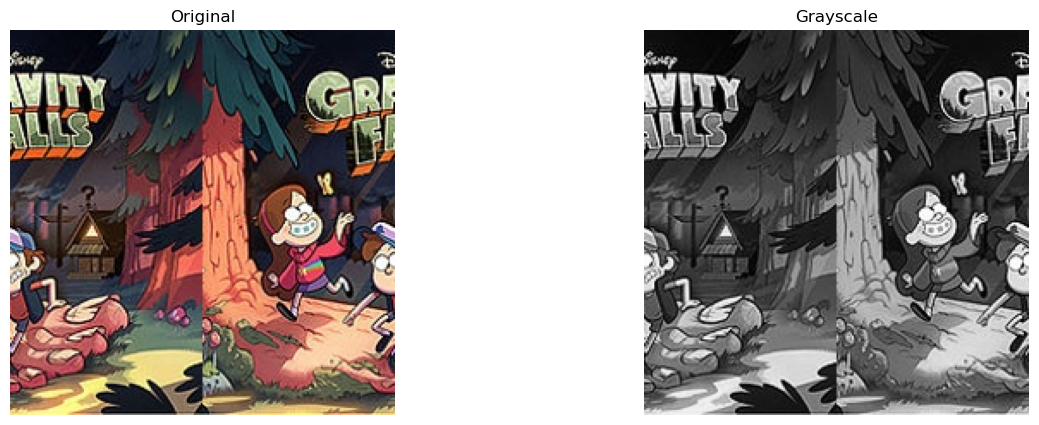

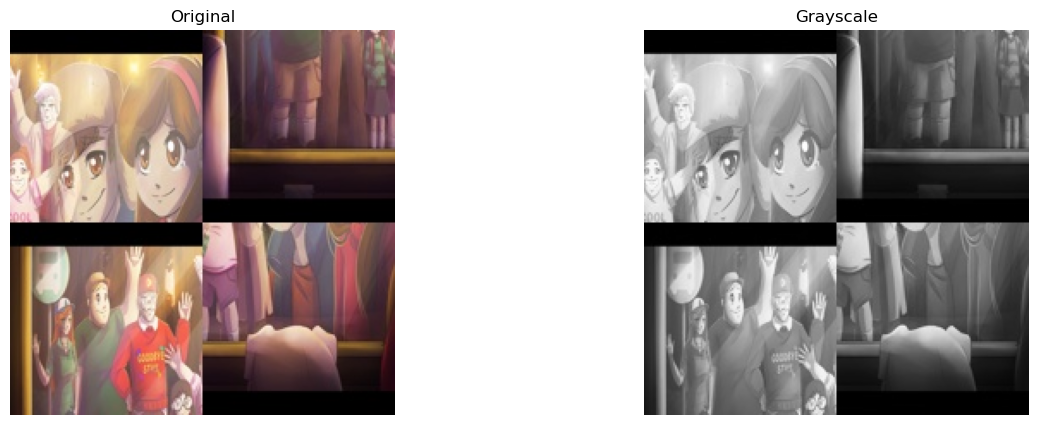

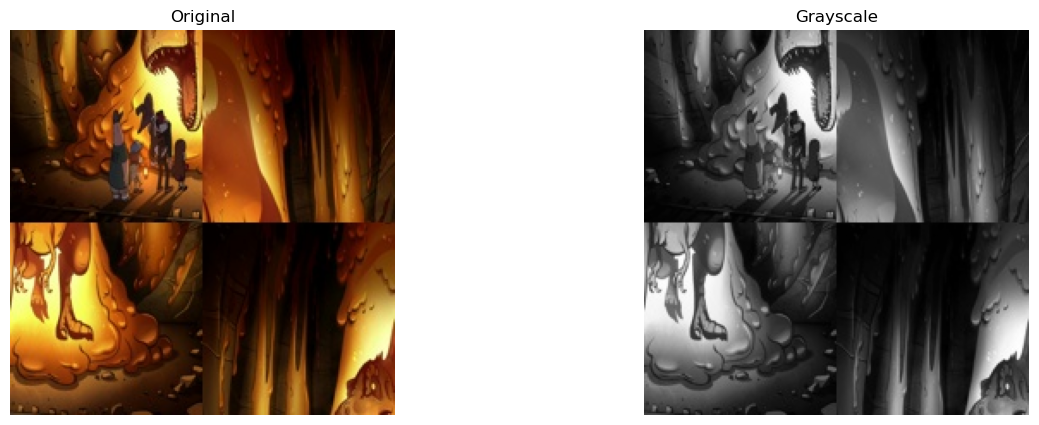

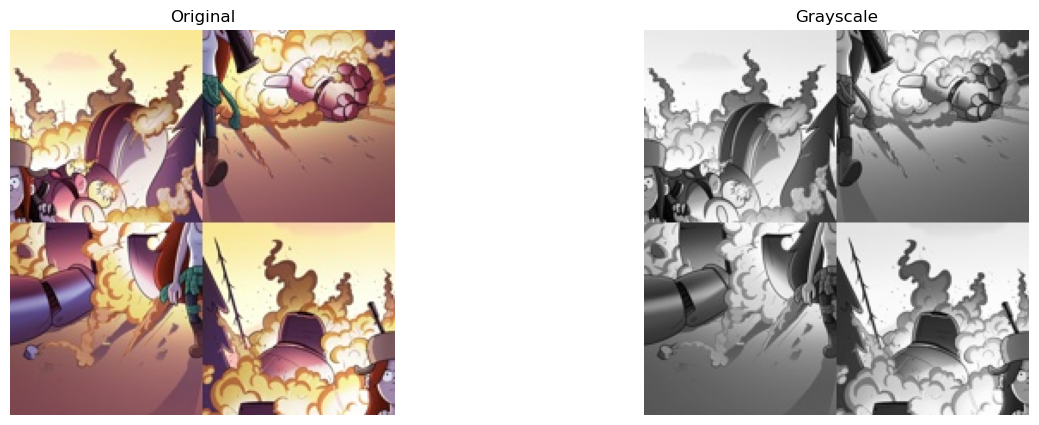

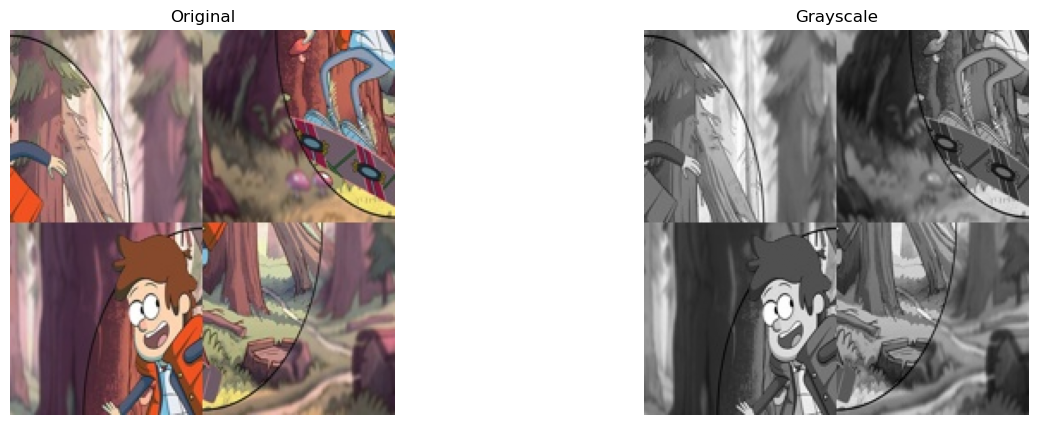

In [13]:
display_limit = 5
display_count = 0

for filename in files:
    img_path = os.path.join(puzzle_folder, filename)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to read {filename}")
        continue

    gray = to_grayscale(img)
    
    # Save grayscale
    base_name = os.path.splitext(filename)[0]
    cv2.imwrite(os.path.join(output_folder, f"{base_name}_grayscale.jpg"), gray)

    # Display only first 5 images
    if display_count < display_limit:
        show_images([img, gray], ["Original", "Grayscale"])
        display_count += 1


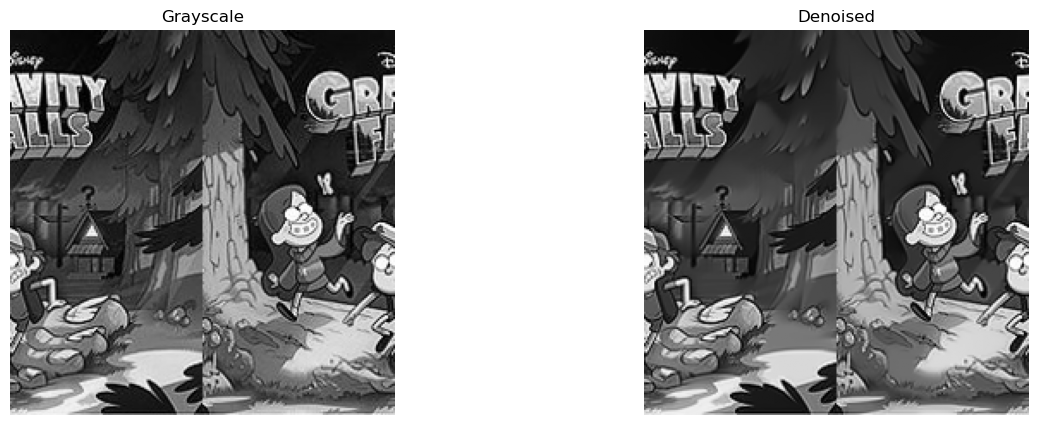

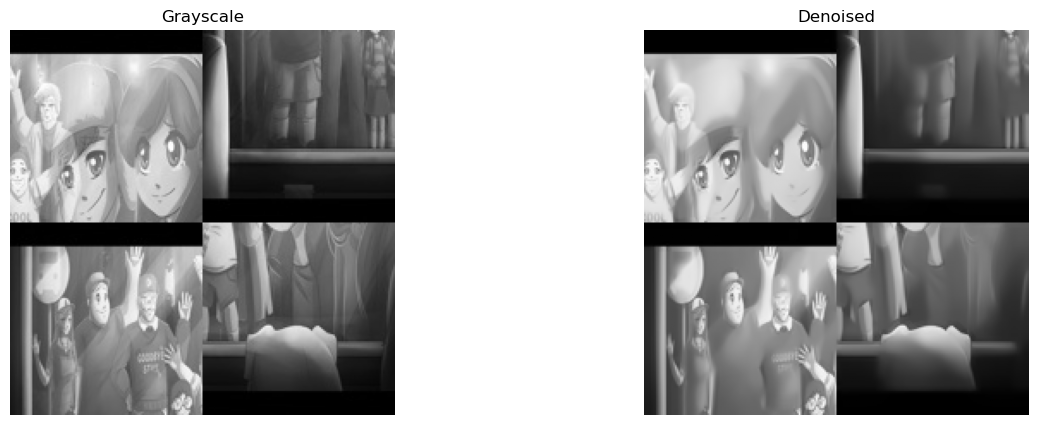

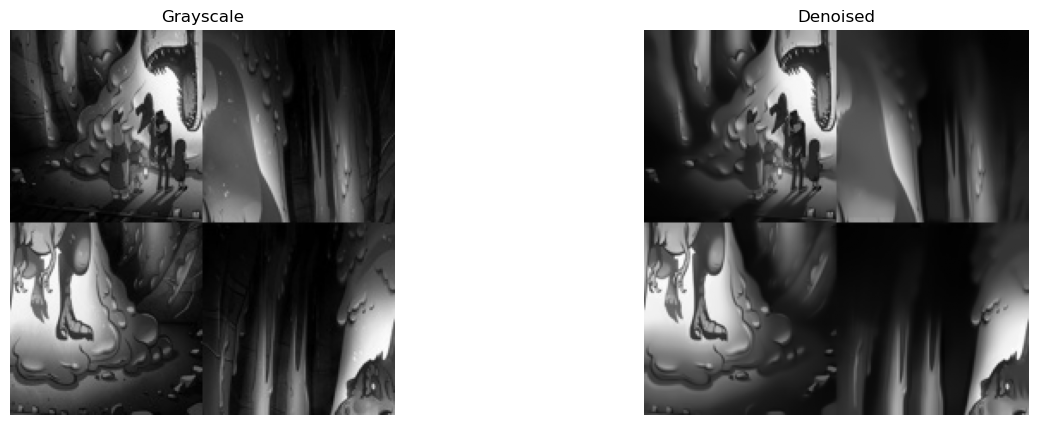

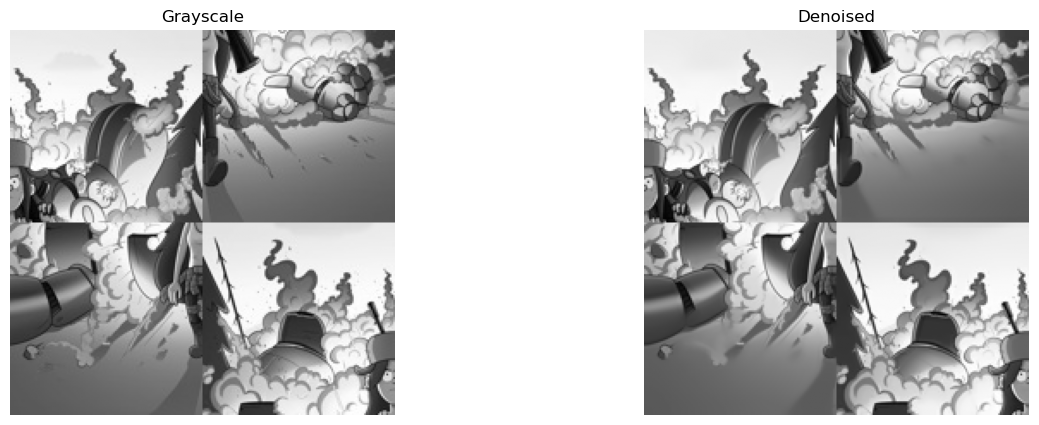

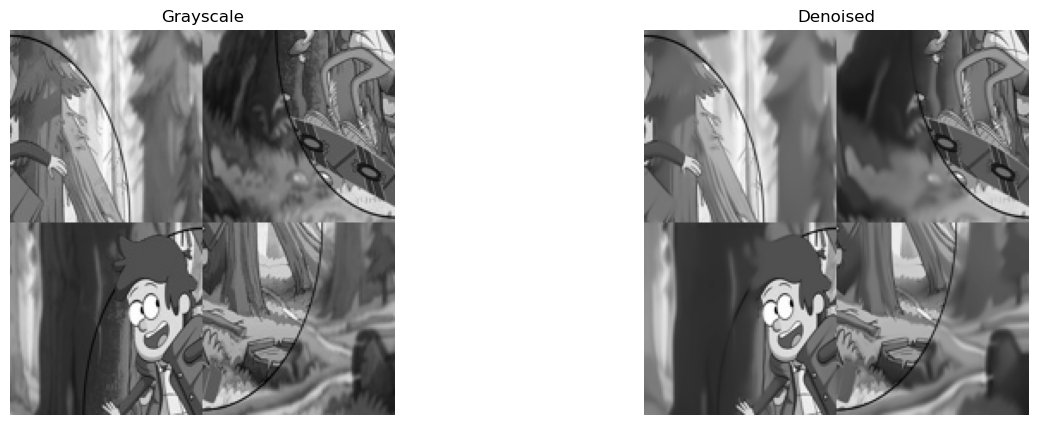

In [14]:
display_count = 0

for filename in files:
    base_name = os.path.splitext(filename)[0]
    gray_path = os.path.join(output_folder, f"{base_name}_grayscale.jpg")
    gray_img = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

    denoised = denoise(gray_img)

    # Save denoised
    cv2.imwrite(os.path.join(output_folder, f"{base_name}_denoised.jpg"), denoised)

    if display_count < display_limit:
        show_images([gray_img, denoised], ["Grayscale", "Denoised"])
        display_count += 1


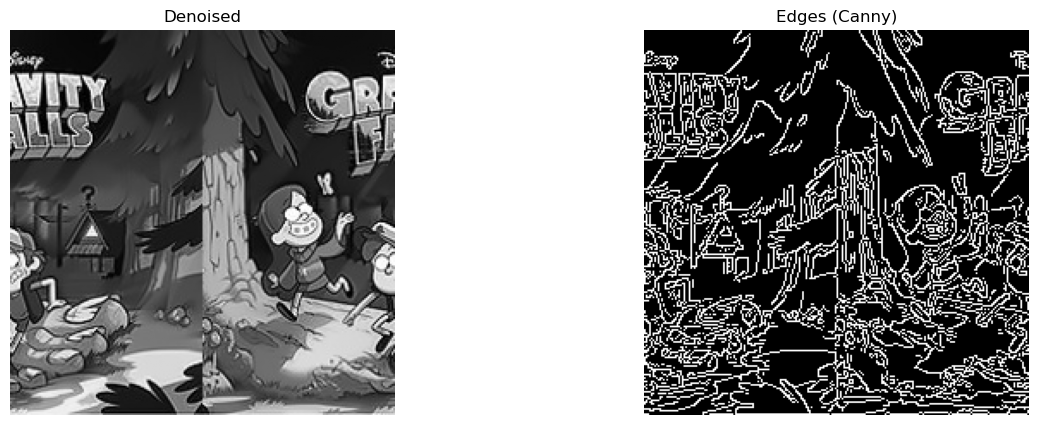

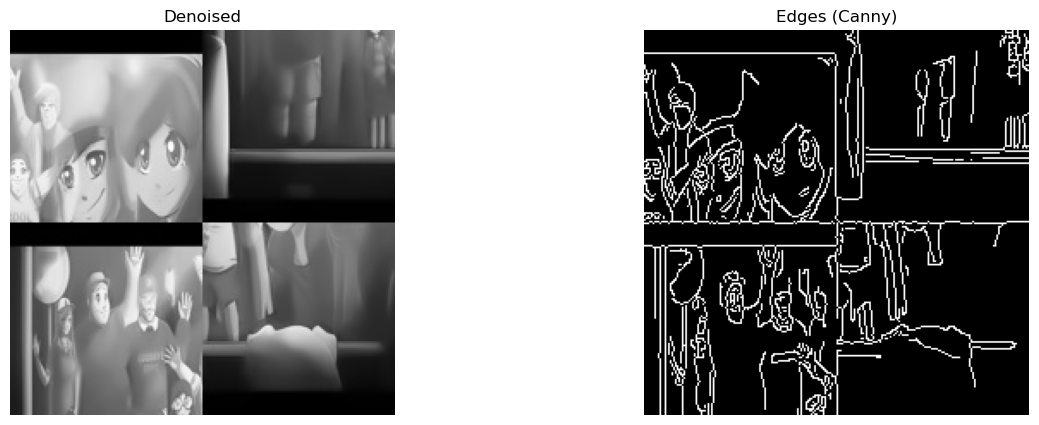

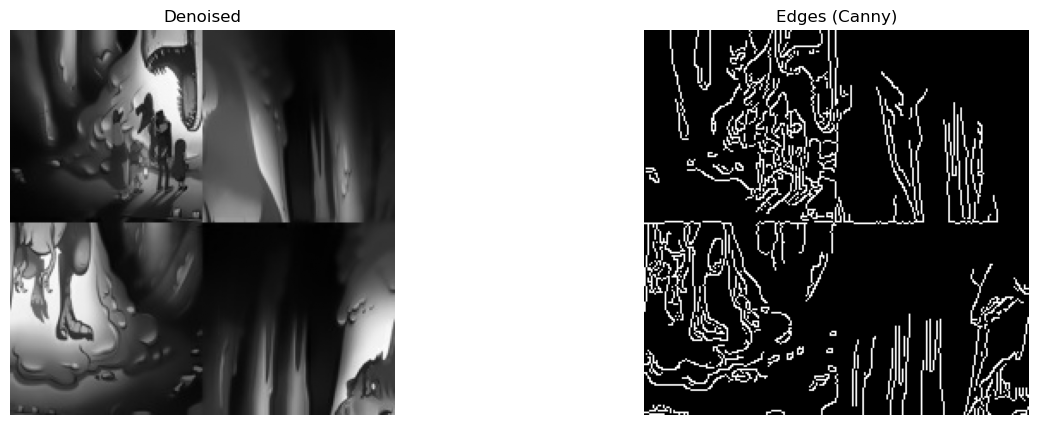

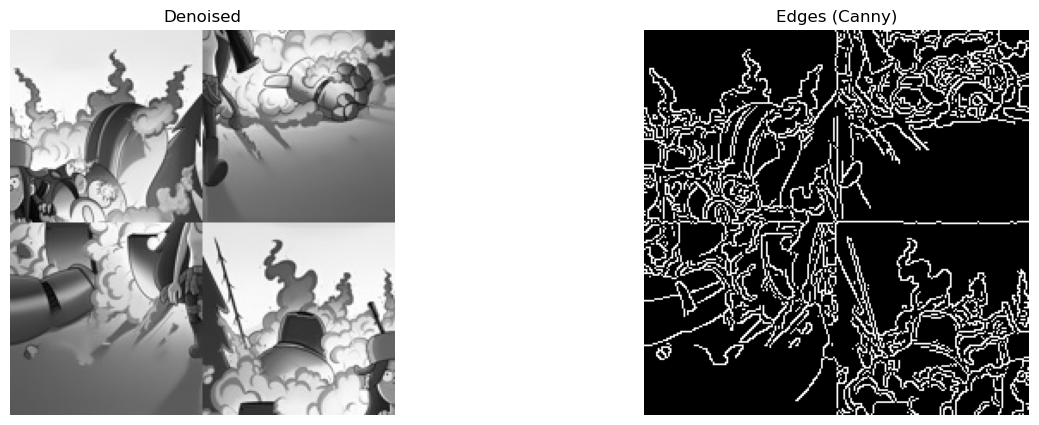

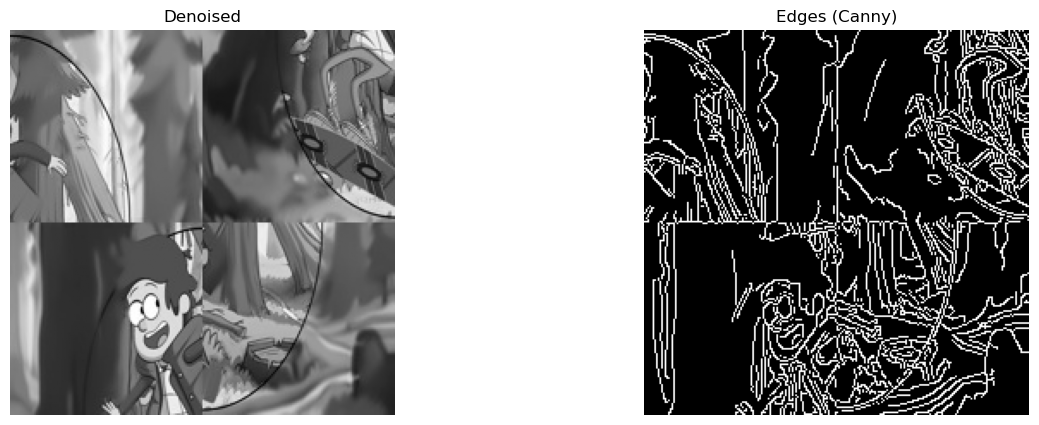

In [17]:
display_limit = 5
display_count = 0

for filename in files:
    base_name = os.path.splitext(filename)[0]
    
    # Read denoised image
    denoised_path = os.path.join(output_folder, f"{base_name}_denoised.jpg")
    denoised_img = cv2.imread(denoised_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply edge detection
    edges = detect_edges(denoised_img, low_threshold=50, high_threshold=150)
    
    # Save edges
    cv2.imwrite(os.path.join(output_folder, f"{base_name}_edges.jpg"), edges)
    
    # Display only first 5 images
    if display_count < display_limit:
        show_images([denoised_img, edges], ["Denoised", "Edges (Canny)"])
        display_count += 1


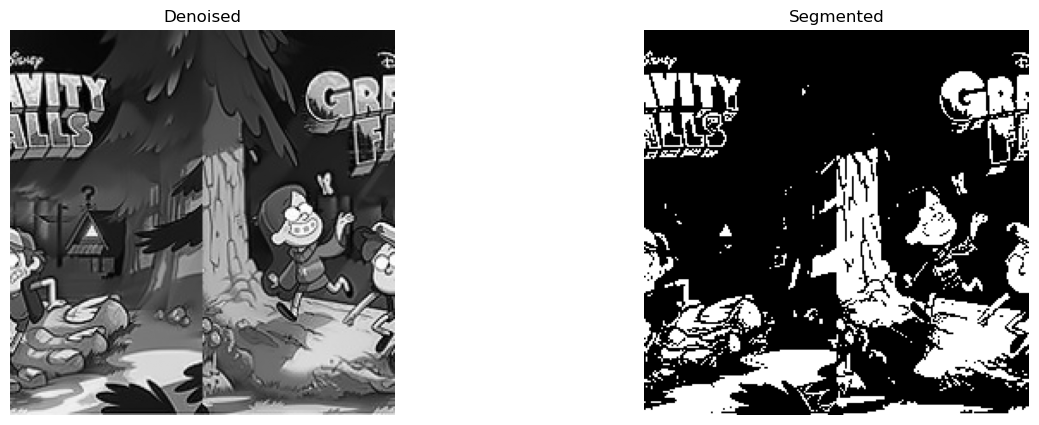

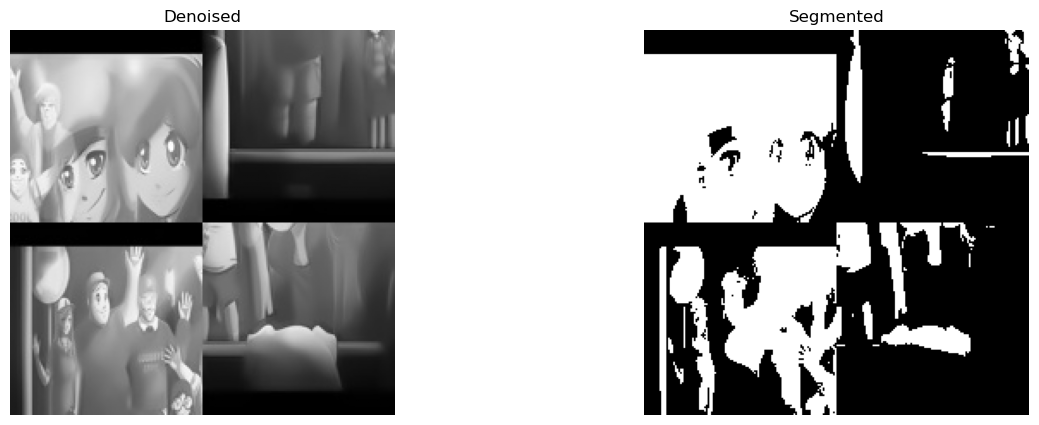

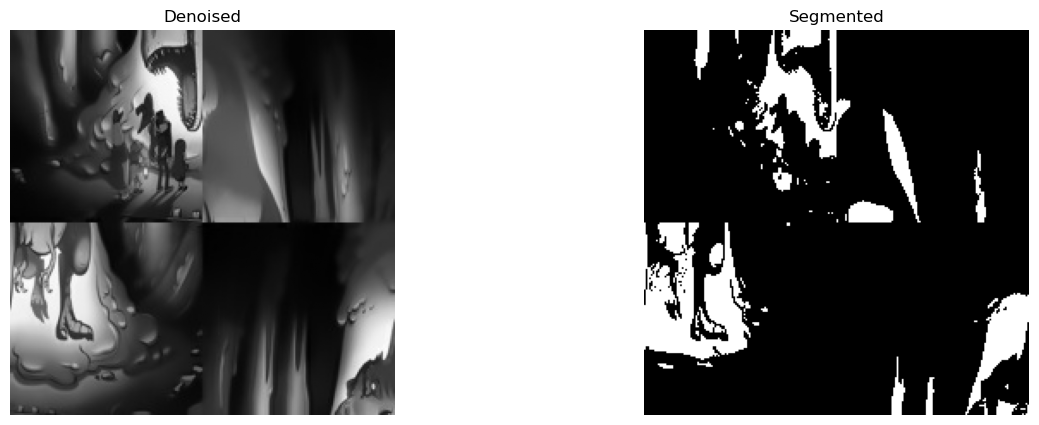

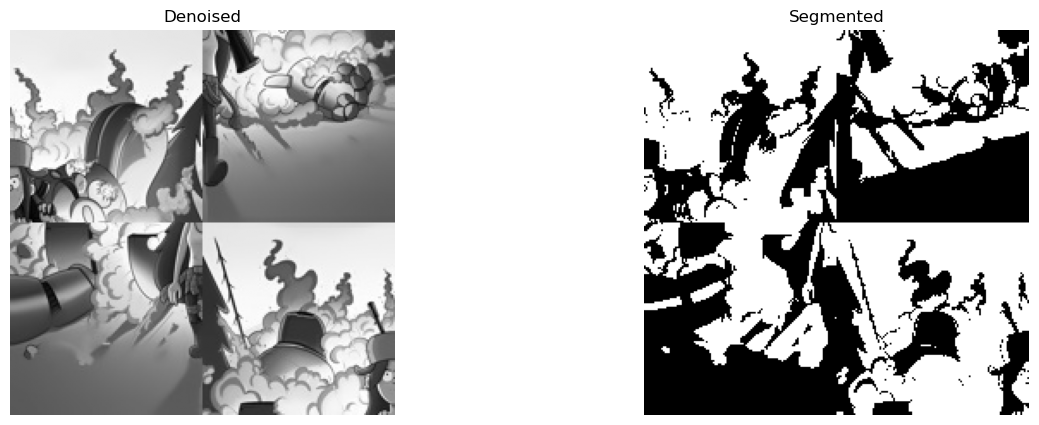

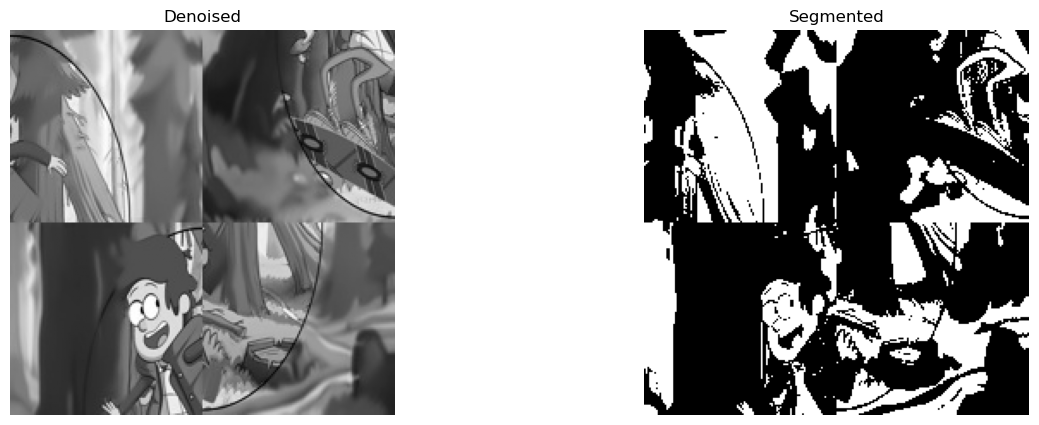

In [15]:
display_count = 0

for filename in files:
    base_name = os.path.splitext(filename)[0]
    denoised_path = os.path.join(output_folder, f"{base_name}_denoised.jpg")
    denoised_img = cv2.imread(denoised_path, cv2.IMREAD_GRAYSCALE)

    segmented = segment(denoised_img)

    # Save segmented
    cv2.imwrite(os.path.join(output_folder, f"{base_name}_segmented.jpg"), segmented)

    if display_count < display_limit:
        show_images([denoised_img, segmented], ["Denoised", "Segmented"])
        display_count += 1


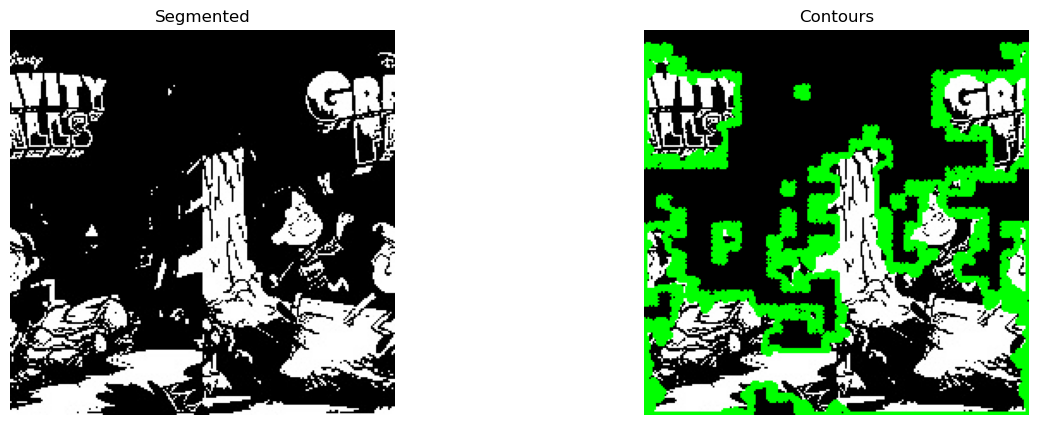

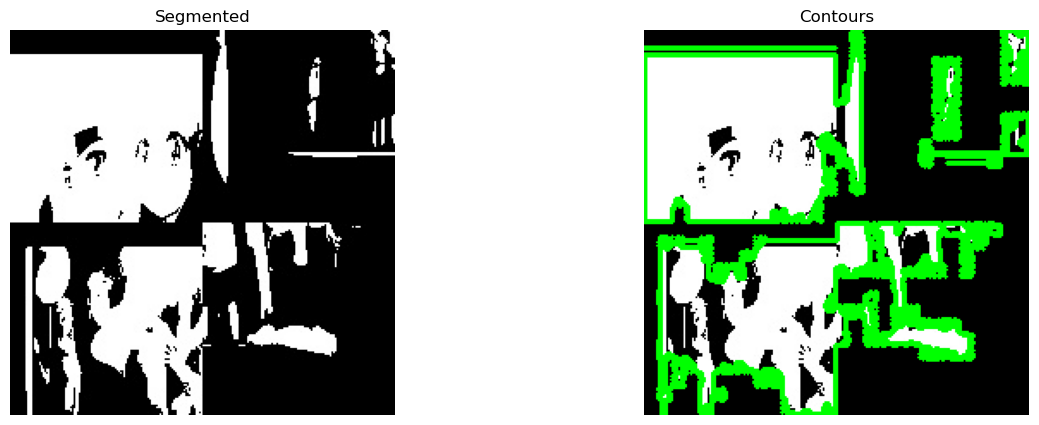

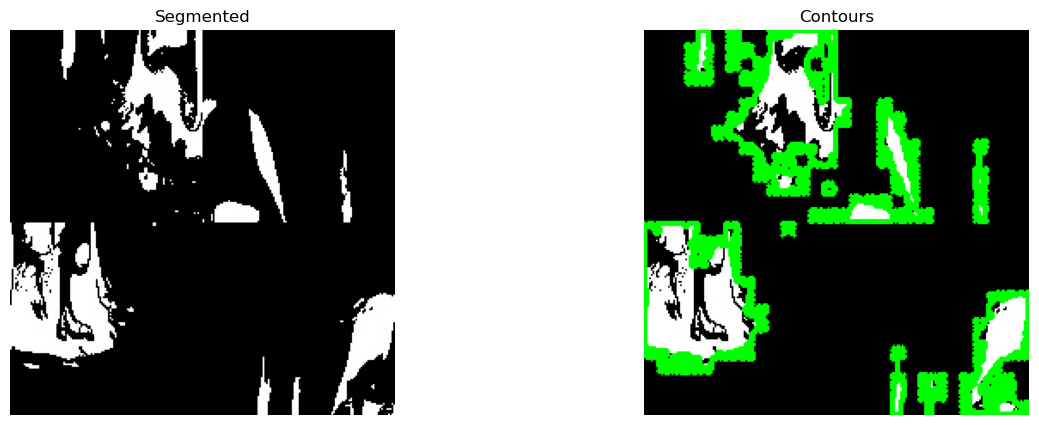

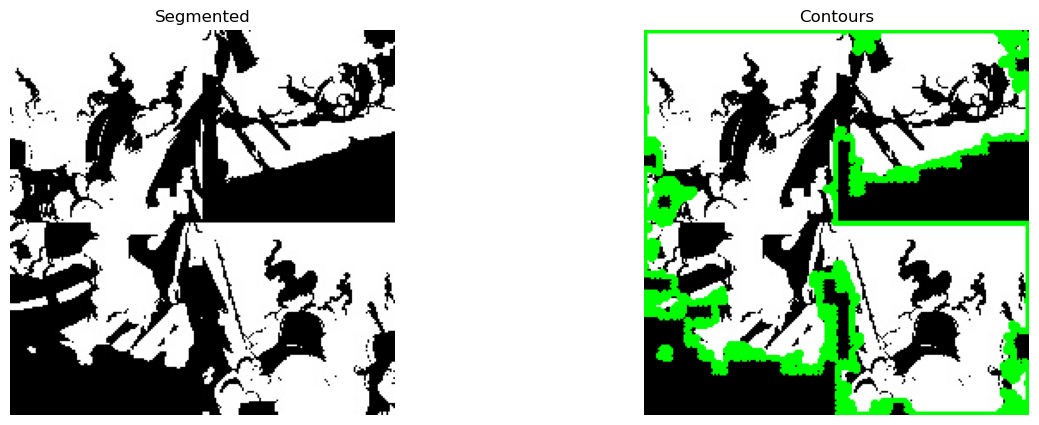

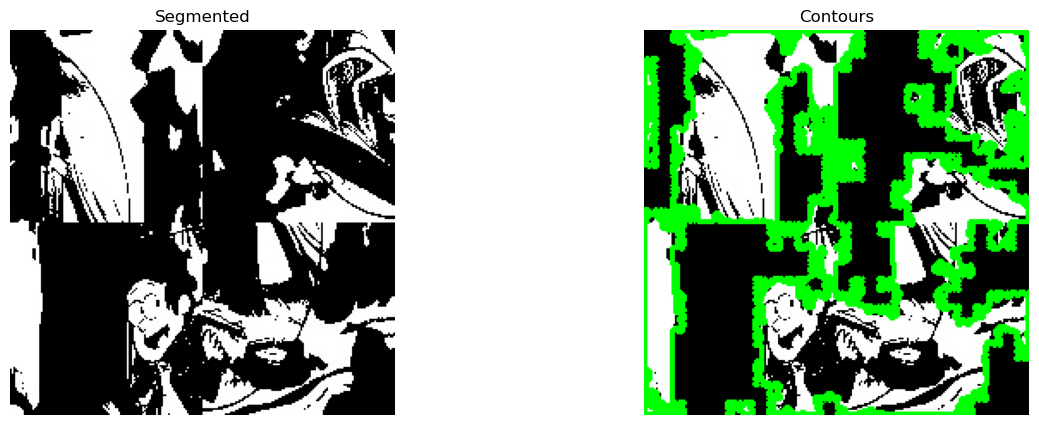

In [16]:
display_count = 0

for filename in files:
    base_name = os.path.splitext(filename)[0]
    segmented_path = os.path.join(output_folder, f"{base_name}_segmented.jpg")
    segmented_img = cv2.imread(segmented_path, cv2.IMREAD_GRAYSCALE)

    contours_img = draw_contours(segmented_img)

    # Save contours
    cv2.imwrite(os.path.join(output_folder, f"{base_name}_contours.jpg"), contours_img)

    if display_count < display_limit:
        show_images([segmented_img, contours_img], ["Segmented", "Contours"])
        display_count += 1
